<a href="https://colab.research.google.com/github/Chainka-Mos/ML_Sandbox/blob/master/%D0%9F%D0%BE%D1%80%D1%82%D1%8F%D0%BD%D0%B0%D1%8F_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%9D%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
#Первым делом зададим данные. Т.к. свобода выбора полная и абсолютная, возьмем цены закрытия акций Лукойл за первые 15 дней января 2019-го года и цены марки Брент того же периода. 
#Пусть за вектор экзогенных переменных X будет цена нефти Брент, за вектор эндогенных будет цена акций Лукойл

In [ ]:
Lukoil = [5070,5100,5200,5250,5300,5400,5310,5400,5300,5330,5300,5450,5150,5120,5140,5300,5215,5200,5120,4900,4700,5070,5100,5200,5250,5300,5400,5310,5400,5300,5330,5300,5450,5150,5120,5140,5300,5215,5200,5120,4900,4700]
Brent = [54.8,55,56,56.2,56.8,57,56.5,56.7,56.2,56.25,56.1,56.65,55.8,55.5,55.6,55.7,55.9,55.1,57.2,55.1,55.1,54.8,55,56,56.2,56.8,57,56.5,56.7,56.2,56.25,56.1,56.65,55.8,55.5,55.6,55.7,55.9,55.1,57.2,55.1,55.1]
data = {'Lukoil':Lukoil,'Brent':Brent}
df = pd.DataFrame(data=data)
df

,Lukoil,Brent
0,5070,54.80
1,5100,55.00
2,5200,56.00
3,5250,56.20
4,5300,56.80
5,5400,57.00
6,5310,56.50
7,5400,56.70
8,5300,56.20
9,5330,56.25


In [ ]:
#Далее построим кор. поле, или по-другому диаграмму рассеивания

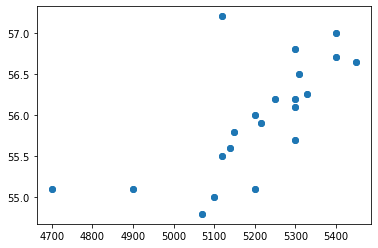

In [ ]:
import matplotlib.pyplot as plt
plt.scatter((df['Lukoil']),(df['Brent']))#имеем вполне линейный, прямой характер связи!

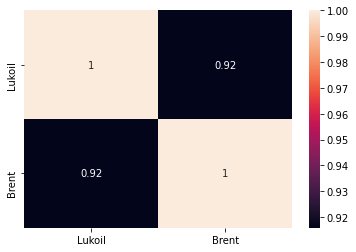

In [ ]:
#Также проверим на кор.связи
import seaborn as sns
sns.heatmap(df.corr(),annot = True)# связь почти под единичку, по шкале Чеддока это говорит о наличии сильной и устойчивой связи что хорошо для предиктивной модели

In [ ]:
#Далее для подбора наиболее оптимального коэффициента воспользуемся встроенными библиотеками, которые базируются на обычном МНК. Конечно, применение именно МНК необходимо обосновывать как минимум 
#проверкой постулатов теоремы Гаусса-Маркова, но т.к. в задании это явно сказано не было, то мы не станем усложнять себе жизнь и просто построим уравнение парной регрессии.

In [ ]:
#Линейная регрессия с предварительной кросс-валидацией и обязательным разбитием на тренировочную и тестовую выборки в формате 80% на 20%
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
Xtrn, Xtest, Ytrn, Ytest = train_test_split(df['Brent'],df['Lukoil'], test_size=0.2)
gls = sm.OLS(Ytrn, Xtrn)
gls_result = gls.fit()
gls_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Lukoil   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.816e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    9.78e-54
Time:                        16:16:45   Log-Likelihood:                         -205.47
No. Observations:                  33   AIC:                                      412.9
Df Residuals:                      32   BIC:                                      414.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brent         93.2382      0.387    241.169      0.000      92.451      94.026
==============================================================================
Omnibus:                       21.784   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                          -1.744   Prob(JB):                     1.47e-07
Kurtosis:                       6.274   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Что же мы имеем в таком случае? При правильно подобранных коэффициентах a0 и a1, где для уравнения вида y = a0*x+a1+e(где a1, правда, равен 0) коэф. a0 - предельные изменения y при изменении x на 1 единицу,
# а a1 - коэффициент смещения, который покрывает постоянную разницу между y и x, коэффициент детерминации, даже смещенный на кол-во регрессоров демонстрирует великолепные 0.99, практически функциональную зависимость.
# Статистическую гипотезу о достоверности выбранного уравнения регрессии можно сделать при помощи F-теста, где при альфа 
# на уровне 0.05 имеем Fконтрольное = 12.7, т.е. Ftest<Fконтр и уравнение признается значимым. Попутно мы также можем заявить, что выполняется первый постулат теоремы Г-М. Значимость экз. переменных
# можно проверить при помощи T-теста, что также представлено в сводной таблице выше. При 0.975 имеем 93.955 => наш единственный регрессор значимый.

In [ ]:
# Финальный пункт - средн.относит.ошибка
from sklearn.metrics import mean_absolute_error
y_predicted = gls_result.predict(Xtest)
mape = mean_absolute_error(Ytest, y_predicted) / Ytest.abs().sum()
mape
#величина по сравнению с нашим Y, который различается день от дня обычно на величины 0.2 и выше, небольшая. Полученное уравнение регресси Y = 93.13X + e может быть использовано как предиктивное.

0.0023525731184589832

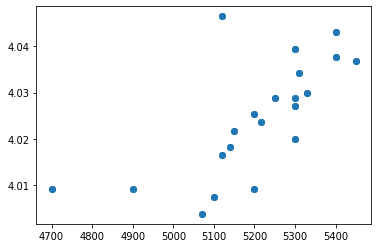

In [ ]:
#Перейдем к задаче 2. Начнем с лог.модели, т.е. изменим x на lnx. По-идеи это должно помочь нам справиться с выбросами, которые были заметны на графике.
data = {'Lukoil':Lukoil,'Brent':np.log(Brent)}
df = pd.DataFrame(data=data)
plt.scatter((df['Lukoil']),(df['Brent']))#фактически, не изменилось ничего...

In [ ]:
##неЛинейная ln-регрессия с предварительной кросс-валидацией и обязательным разбитием на тренировочную и тестовую выборки в формате 80% на 20%
Xtrn, Xtest, Ytrn, Ytest = train_test_split(df['Brent'],df['Lukoil'], test_size=0.2)
gls = sm.OLS(Ytrn, Xtrn)
gls_result = gls.fit()
gls_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Lukoil   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.478e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    6.40e-52
Time:                        16:24:39   Log-Likelihood:                         -209.86
No. Observations:                  33   AIC:                                      421.7
Df Residuals:                      32   BIC:                                      423.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brent       1299.1243      6.139    211.610      0.000    1286.619    1311.630
==============================================================================
Omnibus:                       19.840   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.500
Skew:                          -1.514   Prob(JB):                     3.93e-07
Kurtosis:                       6.505   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#гиперболич. модель
data = {'Lukoil':Lukoil,'Brent':Brent}
df = pd.DataFrame(data=data)
df['Brent'] = df['Brent']*0.1
##неЛинейная гипербол-регрессия с предварительной кросс-валидацией и обязательным разбитием на тренировочную и тестовую выборки в формате 80% на 20%
Xtrn, Xtest, Ytrn, Ytest = train_test_split(df['Brent'],df['Lukoil'], test_size=0.2)
gls = sm.OLS(Ytrn, Xtrn)
gls_result = gls.fit()
gls_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Lukoil   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.263e+04
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    1.40e-51
Time:                        16:29:47   Log-Likelihood:                         -210.29
No. Observations:                  33   AIC:                                      422.6
Df Residuals:                      32   BIC:                                      424.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brent        925.4084      4.482    206.478      0.000     916.279     934.538
==============================================================================
Omnibus:                       12.750   Durbin-Watson:                   2.378
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.447
Skew:                          -1.283   Prob(JB):                      0.00198
Kurtosis:                       4.570   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#степенная модель
data = {'Lukoil':Lukoil,'Brent':Brent}
df = pd.DataFrame(data=data)
df['Brent'] = np.log(df['Brent'])
df['Lukoil'] = np.log(df['Lukoil'])
##неЛинейная гипербол-регрессия с предварительной кросс-валидацией и обязательным разбитием на тренировочную и тестовую выборки в формате 80% на 20%
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
Xtrn, Xtest, Ytrn, Ytest = train_test_split(df['Brent'],df['Lukoil'], test_size=0.2)
gls = sm.OLS(Ytrn, Xtrn)
gls_result = gls.fit()
gls_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Lukoil   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.489e+06
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    3.50e-82
Time:                        16:31:42   Log-Likelihood:                          73.722
No. Observations:                  33   AIC:                                     -145.4
Df Residuals:                      32   BIC:                                     -143.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brent          2.1253      0.001   1867.951      0.000       2.123       2.128
==============================================================================
Omnibus:                       14.622   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.107
Skew:                          -1.496   Prob(JB):                     0.000524
Kurtosis:                       4.428   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_predicted = gls_result.predict(Xtest)
mape = mean_absolute_error(Ytest, y_predicted) / Ytest.abs().sum()
mape

0.00023584616070910532

In [ ]:
#Разве что на последней из моделей, степенной, получаем фактически функциональную связь(R^2 = 1), прекрасную F и T статистики и еще более маленькую ошибку аппроксимации.
# Стоит отметить, что во всех случаях такие высокие показатели были обусловлены во-первых искусственностью данных, во-вторых малым объемом выборки, а в последнем случае к тому же залогорифмированностью
#всех показателей. При обратном переходе к нелин.модели с большой вероятностью результаты сравняются с другими моделями.
#Подытоживая оба задания можно смело заявлять, что с эконометрической точки зрения зависимость y от x(Лукойл и брент) является сильной линейной, и парной регресси тут будет абсолюнто достаточно.